# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r'C:\Users\Rishi\Downloads\price_data.csv')

In [3]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [23]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Correlation:

1. Positive Correlation
2. Negative Correlation

In [24]:
correlation = gold_data.corr()

<Axes: >

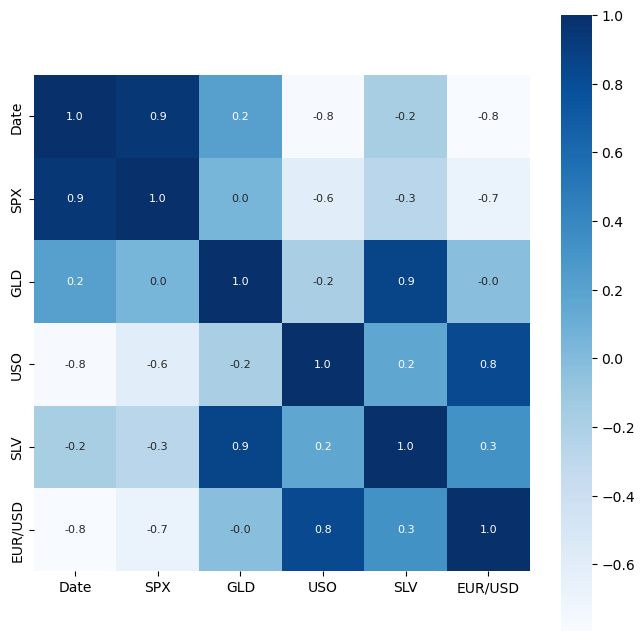

In [26]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [27]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Rishi\AppData\Local\Temp\ipykernel_2424\4061853779.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


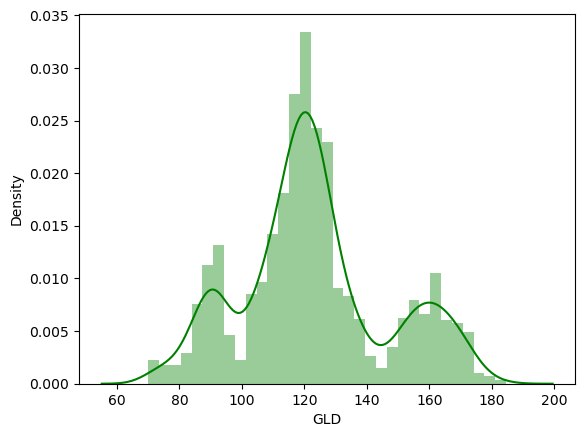

In [29]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')
plt.show()

# Splitting the Features and Target

In [30]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [31]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

# Model Training: Random Forest Regressor

In [35]:
regressor = RandomForestRegressor(n_estimators=100)


In [36]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [37]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [38]:
print(test_data_prediction)

[168.55809969  81.92290007 115.91990006 127.62690104 120.66860112
 154.83479765 150.16709831 125.97609991 117.43279861 126.04560046
 116.56280111 172.40170076 141.66769813 167.83239777 115.11330011
 117.54180046 137.93960282 170.35760089 159.82170268 159.78689917
 155.17470012 125.09970038 174.95579968 157.26930286 125.2632005
  93.67839973  77.53030034 120.62559997 119.01249915 167.51860016
  88.0749003  125.34600044  91.04400066 117.74440009 121.06259894
 136.18680041 115.57070087 114.91600065 146.89819978 107.04350083
 103.57560229  87.34359801 126.53040085 117.6606999  153.28779906
 119.61509986 108.36920026 108.08529783  93.29850043 127.1196978
  75.02150048 113.62559939 121.33550012 111.32219902 119.02589906
 120.76079964 160.54250039 166.23780193 146.98059662  85.70899824
  94.38960051  86.8941986   90.61289968 118.97590075 126.46230093
 127.48330023 168.84049986 122.17539921 117.56539901  98.86290055
 168.72110155 143.4668982  132.3299022  121.06510201 120.94489944
 119.7247003

In [40]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)

print("R squared error : ", error_score)

R squared error :  0.9899839059485395


# Compare the Actual Values and Predicted Values in a Plot

In [42]:
Y_test = list(Y_test)

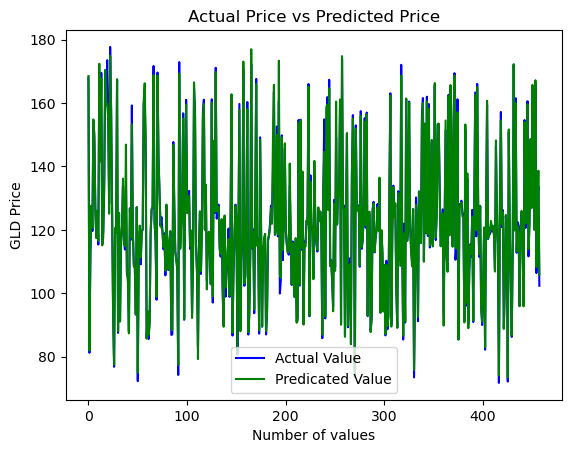

In [46]:
plt.plot(Y_test, color='blue', label ='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicated Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()